# Results

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# Define a custom color palette with a single black color
black_palette = sns.color_palette(['black'])

# Set the color palette to the custom palette
sns.set_palette(black_palette)

# Set the Style to Darkgrid
sns.set_style("darkgrid")

## Load Data

In [70]:
# Read in Parquet File
df_final = pd.read_csv('data.csv')

# Shuffle Rows of Data Using the Same Random Seed Used in the Modeling Notebook
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

In [71]:
# Import Results Data
Black_Scholes = pd.read_csv('test_results/bs_results.csv')
layer3_FFNN = pd.read_csv('test_results/3_Layer_FFNN.csv')
layer4_FFNN = pd.read_csv('test_results/4_Layer_FFNN.csv')
layer5_FFNN = pd.read_csv('test_results/5_Layer_FFNN.csv')
XGBoost_5 = pd.read_csv('test_results/XGBoost_5.csv')
XGBoost_10 = pd.read_csv('test_results/XGBoost_10.csv')

In [72]:
# Recreate Splits
df_final_train = df_final[:int(0.98 * len(df_final))]
df_final_val = df_final[int(0.98 * len(df_final)):int(0.99 * len(df_final))]
df_final_test = df_final[int(0.99 * len(df_final)):]

In [73]:
df_final.columns

Index(['strike_price', 'under_price', 'zero_coupon', 'div_yield', 'midpoint',
       'opt_type', 'time', 'under_lag1', 'under_lag2', 'under_lag3',
       'under_lag4', 'under_lag5', 'under_lag6', 'under_lag7', 'under_lag8',
       'under_lag9', 'under_lag10', 'under_lag11', 'under_lag12',
       'under_lag13', 'under_lag14', 'under_lag15', 'under_lag16',
       'under_lag17', 'under_lag18', 'under_lag19', 'under_lag20'],
      dtype='object')

In [74]:
# Filter all the columns that start with 'under_lag'
price_columns = [col for col in df_final_test.columns if col.startswith('under_lag')]
price_test = df_final_test[price_columns]
# Make a Column with Each Rows Standard Deviation
df_final_test['Historical Volatility'] = price_test.std(axis=1)

In [75]:
# Rename 'under_lag0' to 'underlying_price'
df_final_test.rename(columns={'under_lag0': 'Underlying Price'}, inplace=True)
# Remove all the columns that start with 'under_lag'
# and create a new dataframe called df_final_test_clean
df_filt = df_final_test[df_final_test.columns.drop(list(df_final_test.filter(regex='under_lag')))]

In [76]:
# Rename the columns
df_filt.columns = ['Strike Price', 'Underlying Price', 'Zero Coupon', 'Dividend Yield', 'Midpoint',
       'Option Type', 'Time', 'Historical Volatility']
# Revert 'Option Type' to 'Call' or 'Put'
df_filt['Option Type'] = df_filt['Option Type'].apply(lambda x: 'Call' if x == 1 else 'Put')
# Sort df_filt by 'Option Price' in descending order
df_filt = df_filt.sort_values(by='Midpoint', ascending=False)

In [77]:
# Reset Index of df_filt
df_filt = df_filt.reset_index(drop=True)

In [78]:
# Append the 'Absolute Error' columns from the results dataframes to df_filt
df_filt['Black-Scholes Absolute Error'] = Black_Scholes['Absolute Error']
df_filt['3 Layer FFNN Absolute Error'] = layer3_FFNN['Absolute Error']
df_filt['4 Layer FFNN Absolute Error'] = layer4_FFNN['Absolute Error']
df_filt['5 Layer FFNN Absolute Error'] = layer5_FFNN['Absolute Error']
df_filt['XGBoost 5 Absolute Error'] = XGBoost_5['Absolute Error']
df_filt['XGBoost 10 Absolute Error'] = XGBoost_10['Absolute Error']

# Append the 'Absolute Percentage Error' columns from the results dataframes to df_filt
df_filt['Black-Scholes Absolute Percentage Error'] = Black_Scholes['Absolute Percentage Error']
df_filt['3 Layer FFNN Absolute Percentage Error'] = layer3_FFNN['Absolute Percentage Error']
df_filt['4 Layer FFNN Absolute Percentage Error'] = layer4_FFNN['Absolute Percentage Error']
df_filt['5 Layer FFNN Absolute Percentage Error'] = layer5_FFNN['Absolute Percentage Error']
df_filt['XGBoost 5 Absolute Percentage Error'] = XGBoost_5['Absolute Percentage Error']
df_filt['XGBoost 10 Absolute Percentage Error'] = XGBoost_10['Absolute Percentage Error']

In [79]:
df_filt.head()

Strike Price  Underlying Price  Zero Coupon  Dividend Yield  Midpoint  \
0        4100.0            9850.0       0.3823          0.9340    5750.0   
1        7000.0           12590.0       0.4575          0.8350    5596.0   
2        7600.0           13100.0       0.5566          0.9000    5508.0   
3        6200.0           11680.0       0.4443          0.9116    5490.0   
4        7200.0           12590.0       0.4575          0.8350    5396.0   

  Option Type     Time  Historical Volatility  Black-Scholes Absolute Error  \
0        Call  0.01643             207.560162                     19.351228   
1        Call  0.10406             249.240425                      6.624403   
2        Call  0.07666             169.053838                      9.069724   
3        Call  0.06573             360.789471                     20.942509   
4        Call  0.10406             249.240425                      9.659863   

   3 Layer FFNN Absolute Error  4 Layer FFNN Absolute Error  \
0                    11.535645                     8.934082   
1                     9.122070                     8.311035   
2                     1.727051                     4.162109   
3                     3.093262                     5.328613   
4                    22.087402                    10.090332   

   5 Layer FFNN Absolute Error  XGBoost 5 Absolute Error  \
0                    38.846680                 63.518066   
1                    10.006836                 14.788574   
2                     7.000977                243.977540   
3                     7.218750                 54.759277   
4                    11.049805                120.155760   

   XGBoost 10 Absolute Error  Black-Scholes Absolute Percentage Error  \
0                 100.601074                                 0.330590   
1                  26.200195                                 0.113931   
2                 233.474120                                 0.156181   
3                 144.881350                                 0.367445   
4                 116.863280                                 0.174727   

   3 Layer FFNN Absolute Percentage Error  \
0                                0.194991   
1                                0.154298   
2                                0.030384   
3                                0.056159   
4                                0.405125   

   4 Layer FFNN Absolute Percentage Error  \
0                                0.151016   
1                                0.140579   
2                                0.073225   
3                                0.096743   
4                                0.185076   

   5 Layer FFNN Absolute Percentage Error  \
0                                0.656638   
1                                0.169263   
2                                0.123170   
3                                0.131059   
4                                0.202674   

   XGBoost 5 Absolute Percentage Error  XGBoost 10 Absolute Percentage Error  
0                             1.073666                              1.700491  
1                             0.250145                              0.443170  
2                             4.292357                              4.107567  
3                             0.994177                              2.630380  
4                             2.203884                              2.143494

In [80]:
# Function to Plot a Value's Absolute Error for Every Model
def plot_absolute_error(df, x_value, x_log=True, y_log=True):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
    sns.scatterplot(x=x_value, y='Black-Scholes Absolute Error', data=df, ax=axes[0, 0])
    sns.scatterplot(x=x_value, y='XGBoost 5 Absolute Error', data=df, ax=axes[0, 1])
    sns.scatterplot(x=x_value, y='XGBoost 10 Absolute Error', data=df, ax=axes[0, 2])
    sns.scatterplot(x=x_value, y='3 Layer FFNN Absolute Error', data=df, ax=axes[1, 0])
    sns.scatterplot(x=x_value, y='4 Layer FFNN Absolute Error', data=df, ax=axes[1, 1])
    sns.scatterplot(x=x_value, y='5 Layer FFNN Absolute Error', data=df, ax=axes[1, 2])

    if x_log == True:
        # Make x axis log scale
        axes[0, 0].set_xscale('log')
        axes[0, 1].set_xscale('log')
        axes[1, 0].set_xscale('log')
        axes[1, 1].set_xscale('log')
        axes[0, 2].set_xscale('log')
        axes[1, 2].set_xscale('log')

    if y_log == True:
        # Make y axis log scale
        axes[0, 0].set_yscale('log')
        axes[0, 1].set_yscale('log')
        axes[1, 0].set_yscale('log')
        axes[1, 1].set_yscale('log')
        axes[0, 2].set_yscale('log')
        axes[1, 2].set_yscale('log')

    # Add Individual Titles
    axes[0, 0].set_title('Black-Scholes', fontsize=14)
    axes[0, 1].set_title('XGBoost 5', fontsize=14)
    axes[0, 2].set_title('XGBoost 10', fontsize=14)
    axes[1, 0].set_title('3 Layer FFNN', fontsize=14)
    axes[1, 1].set_title('4 Layer FFNN', fontsize=14)
    axes[1, 2].set_title('5 Layer FFNN', fontsize=14)

    # Add Common X and Y Labels
    fig.text(0.5, 0.04, x_value, ha='center', va='center', fontsize=14)
    fig.text(0.04, 0.5, 'Absolute Error', ha='center', va='center', rotation='vertical', fontsize=14)

    # Remove Individual x and y Labels
    axes[0, 0].set_xlabel('')
    axes[0, 1].set_xlabel('')
    axes[1, 0].set_xlabel('')
    axes[1, 1].set_xlabel('')
    axes[0, 2].set_xlabel('')
    axes[1, 2].set_xlabel('')
    axes[0, 0].set_ylabel('')
    axes[0, 1].set_ylabel('')
    axes[1, 0].set_ylabel('')
    axes[1, 1].set_ylabel('')
    axes[0, 2].set_ylabel('')
    axes[1, 2].set_ylabel('')

    # Get the Maximum and Minimum values for all of the x-axis values
    x_max = df_filt[x_value].max()
    x_min = df_filt[x_value].min()

    # Get the Maximum and Minimum values from all of the absolute error columns
    y_max = df_filt[['Black-Scholes Absolute Error', 'XGBoost 5 Absolute Error', 'XGBoost 10 Absolute Error',
                        '3 Layer FFNN Absolute Error', '4 Layer FFNN Absolute Error', '5 Layer FFNN Absolute Error']].max().max()
    y_min = df_filt[['Black-Scholes Absolute Error', 'XGBoost 5 Absolute Error', 'XGBoost 10 Absolute Error',
                        '3 Layer FFNN Absolute Error', '4 Layer FFNN Absolute Error', '5 Layer FFNN Absolute Error']].min().min()
    
    # Set Common x and y Limits for all plots
    axes[0, 0].set_xlim(x_min, x_max)
    axes[0, 1].set_xlim(x_min, x_max)
    axes[1, 0].set_xlim(x_min, x_max)
    axes[1, 1].set_xlim(x_min, x_max)
    axes[0, 2].set_xlim(x_min, x_max)
    axes[1, 2].set_xlim(x_min, x_max)
    axes[0, 0].set_ylim(y_min, y_max)
    axes[0, 1].set_ylim(y_min, y_max)
    axes[1, 0].set_ylim(y_min, y_max)
    axes[1, 1].set_ylim(y_min, y_max)
    axes[0, 2].set_ylim(y_min, y_max)
    axes[1, 2].set_ylim(y_min, y_max)

    # Add More Space Between Models and all the plots
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    # Title the entire figure
    fig.suptitle('Absolute Error Histograms', fontsize=16)

In [81]:
# Function to Plot a Value's Absolute Percentage Error for Every Model
def plot_absolute_percentage_error(df, x_value, x_log=True, y_log=True):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 8))
    sns.scatterplot(x=x_value, y='Black-Scholes Absolute Percentage Error', data=df, ax=axes[0, 0])
    sns.scatterplot(x=x_value, y='XGBoost 5 Absolute Percentage Error', data=df, ax=axes[0, 1])
    sns.scatterplot(x=x_value, y='XGBoost 10 Absolute Percentage Error', data=df, ax=axes[0, 2])
    sns.scatterplot(x=x_value, y='3 Layer FFNN Absolute Percentage Error', data=df, ax=axes[1, 0])
    sns.scatterplot(x=x_value, y='4 Layer FFNN Absolute Percentage Error', data=df, ax=axes[1, 1])
    sns.scatterplot(x=x_value, y='5 Layer FFNN Absolute Percentage Error', data=df, ax=axes[1, 2])

    if x_log == True:
        # Make x axis log scale
        axes[0, 0].set_xscale('log')
        axes[0, 1].set_xscale('log')
        axes[0, 2].set_xscale('log')
        axes[1, 0].set_xscale('log')
        axes[1, 1].set_xscale('log')
        axes[1, 2].set_xscale('log')

    if y_log == True:
        # Make y axis log scale
        axes[0, 0].set_yscale('log')
        axes[0, 1].set_yscale('log')
        axes[0, 2].set_yscale('log')
        axes[1, 0].set_yscale('log')
        axes[1, 1].set_yscale('log')
        axes[1, 2].set_yscale('log')

    # Add Individual Titles
    axes[0, 0].set_title('Black-Scholes', fontsize=14)
    axes[0, 1].set_title('XGBoost 5', fontsize=14)
    axes[0, 2].set_title('XGBoost 10', fontsize=14)
    axes[1, 0].set_title('3 Layer FFNN', fontsize=14)
    axes[1, 1].set_title('4 Layer FFNN', fontsize=14)
    axes[1, 2].set_title('5 Layer FFNN', fontsize=14)

    # Add Common X and Y Labels
    fig.text(0.5, 0.04, x_value, ha='center', va='center', fontsize=14)
    fig.text(0.04, 0.5, 'Absolute Percentage Error', ha='center', va='center', rotation='vertical', fontsize=14)

    # Remove Individual x and y Labels
    axes[0, 0].set_xlabel('')
    axes[0, 1].set_xlabel('')
    axes[1, 0].set_xlabel('')
    axes[1, 1].set_xlabel('')
    axes[0, 2].set_xlabel('')
    axes[1, 2].set_xlabel('')
    axes[0, 0].set_ylabel('')
    axes[0, 1].set_ylabel('')
    axes[1, 0].set_ylabel('')
    axes[1, 1].set_ylabel('')
    axes[0, 2].set_ylabel('')
    axes[1, 2].set_ylabel('')

    # Get the Maximum and Minimum values for all of the x-axis values
    x_max = df_filt[x_value].max()
    x_min = df_filt[x_value].min()

    # Get the Maximum and Minimum values from all of the absolute percentage error columns
    y_max = df_filt[['Black-Scholes Absolute Percentage Error', 'XGBoost 5 Absolute Percentage Error',
                        'XGBoost 10 Absolute Percentage Error', '3 Layer FFNN Absolute Percentage Error',
                        '4 Layer FFNN Absolute Percentage Error', '5 Layer FFNN Absolute Percentage Error']].max().max()
    y_min = df_filt[['Black-Scholes Absolute Percentage Error', 'XGBoost 5 Absolute Percentage Error',
                        'XGBoost 10 Absolute Percentage Error', '3 Layer FFNN Absolute Percentage Error',
                        '4 Layer FFNN Absolute Percentage Error', '5 Layer FFNN Absolute Percentage Error']].min().min()
    
    # Set Common x and y Limits for all plots
    axes[0, 0].set_xlim(x_min, x_max)
    axes[0, 1].set_xlim(x_min, x_max)
    axes[1, 0].set_xlim(x_min, x_max)
    axes[1, 1].set_xlim(x_min, x_max)
    axes[0, 2].set_xlim(x_min, x_max)
    axes[1, 2].set_xlim(x_min, x_max)
    axes[0, 0].set_ylim(y_min, y_max)
    axes[0, 1].set_ylim(y_min, y_max)
    axes[1, 0].set_ylim(y_min, y_max)
    axes[1, 1].set_ylim(y_min, y_max)
    axes[0, 2].set_ylim(y_min, y_max)
    axes[1, 2].set_ylim(y_min, y_max)



    # Add More Space Between Models and all the plots
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    # Title the entire figure
    fig.suptitle('Absolute Percentage Error Histograms', fontsize=16)

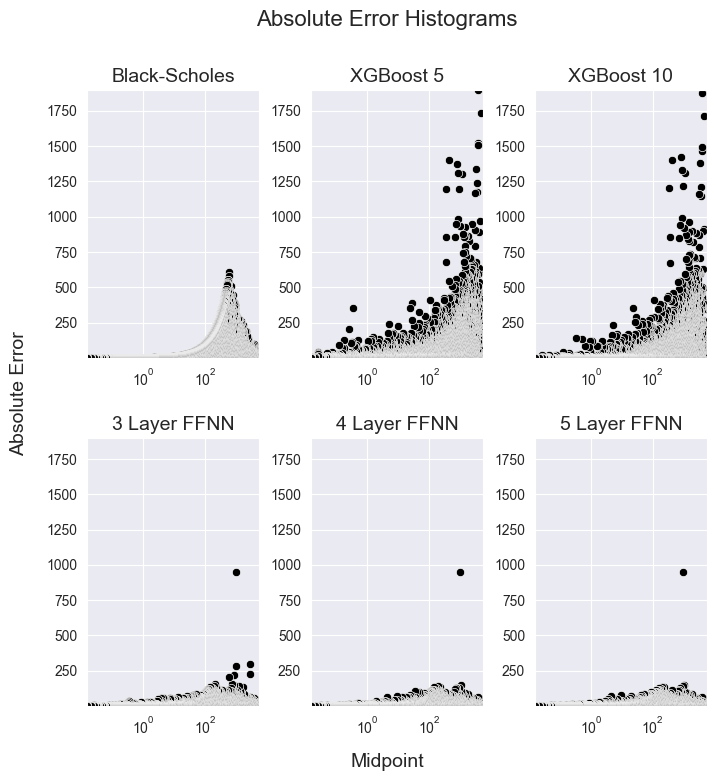

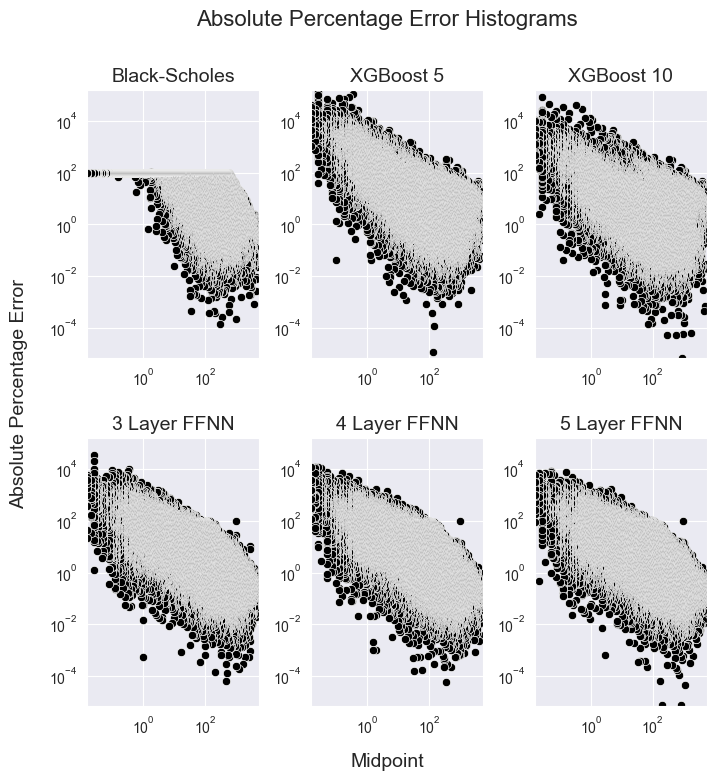

In [82]:
x_value = 'Midpoint'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

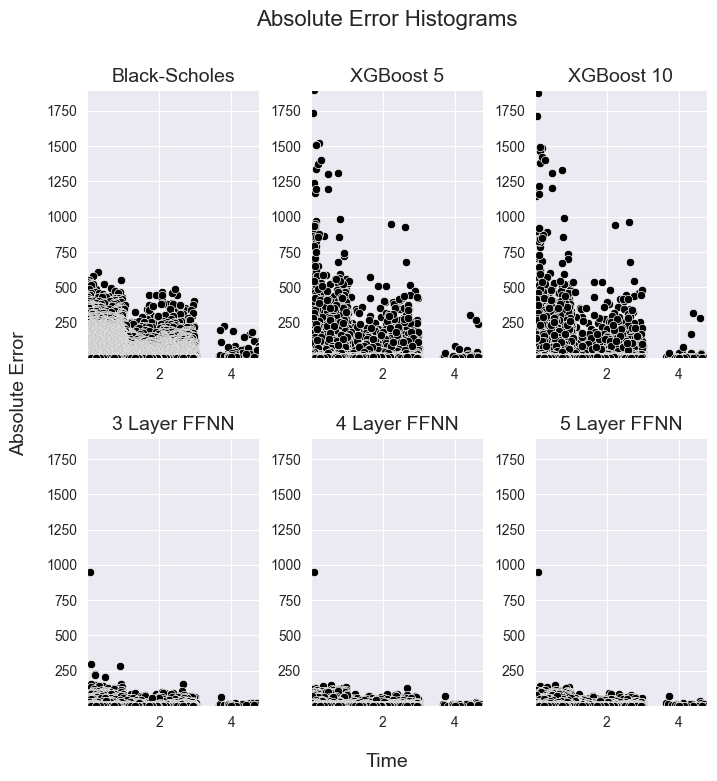

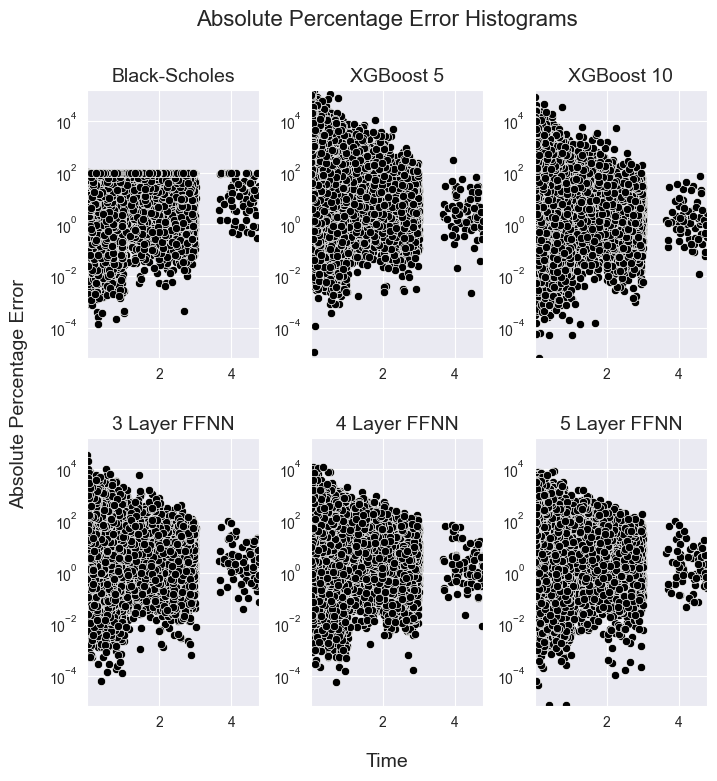

In [83]:
x_value = 'Time'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

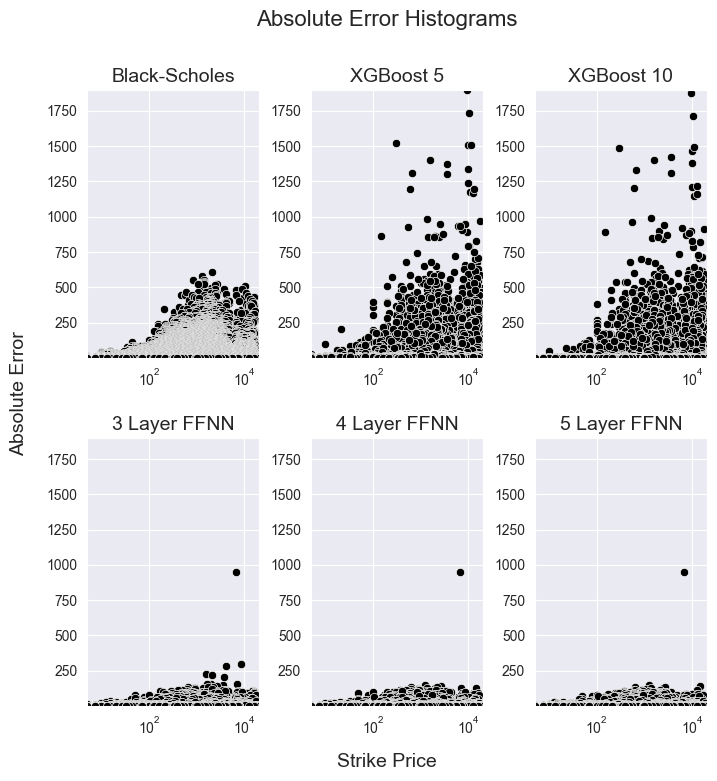

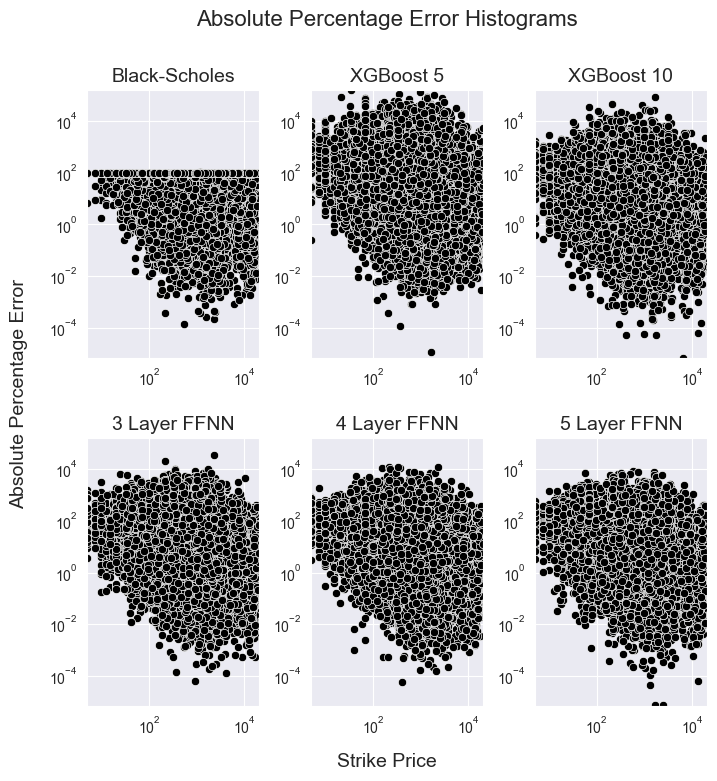

In [84]:
x_value = 'Strike Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

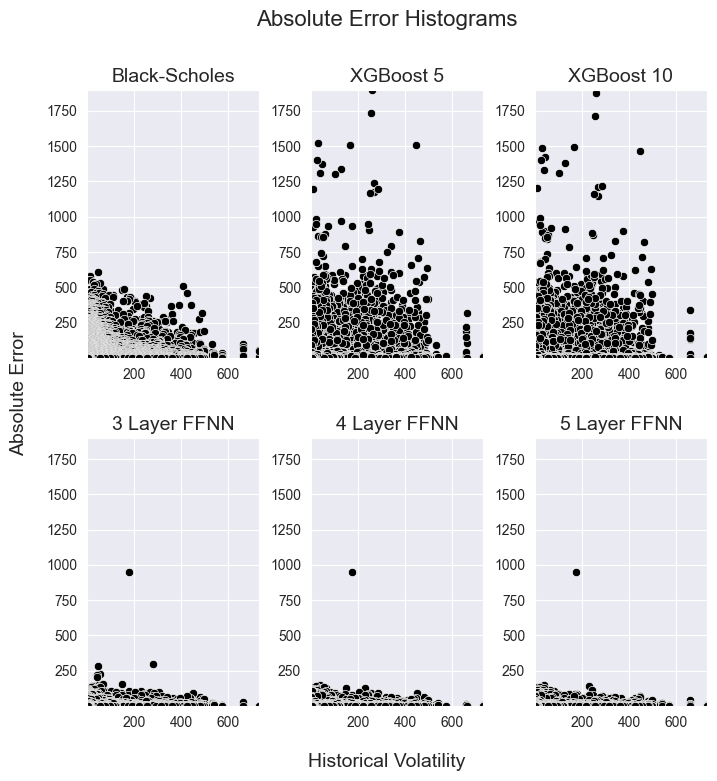

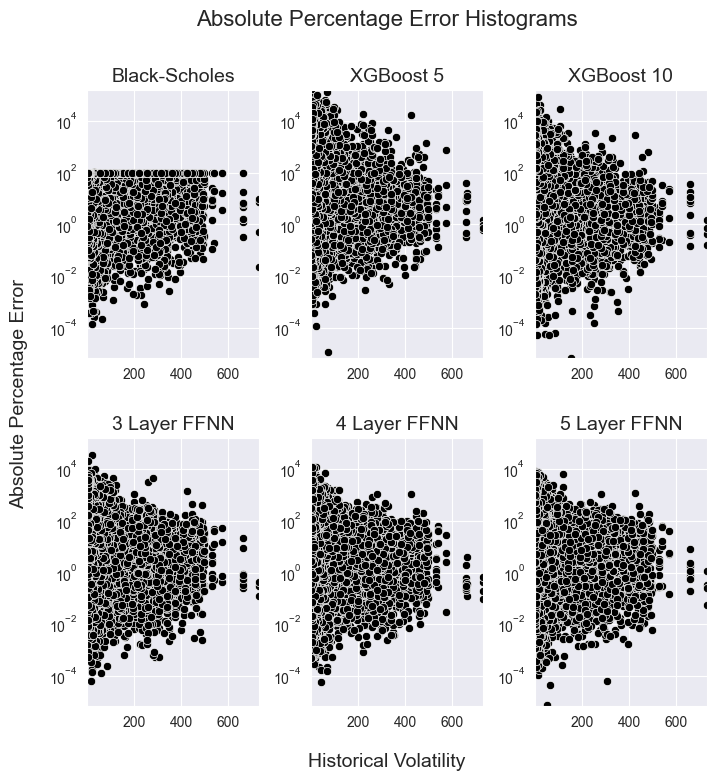

In [85]:
x_value = 'Historical Volatility'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

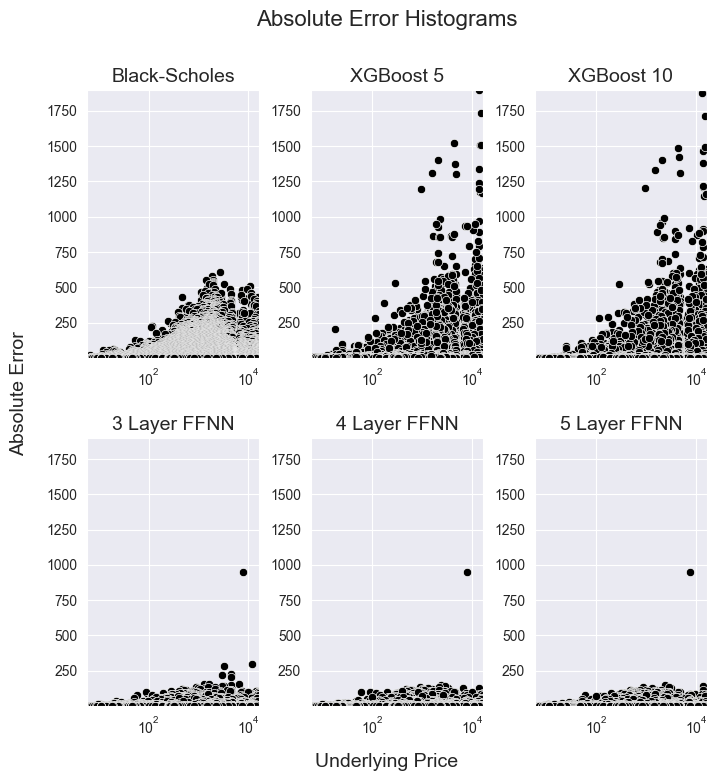

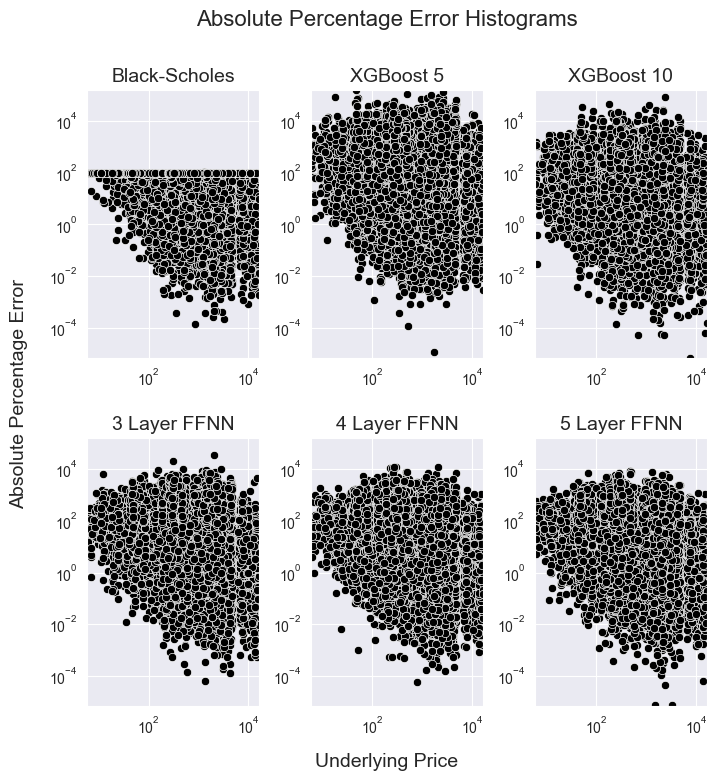

In [86]:
x_value = 'Underlying Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

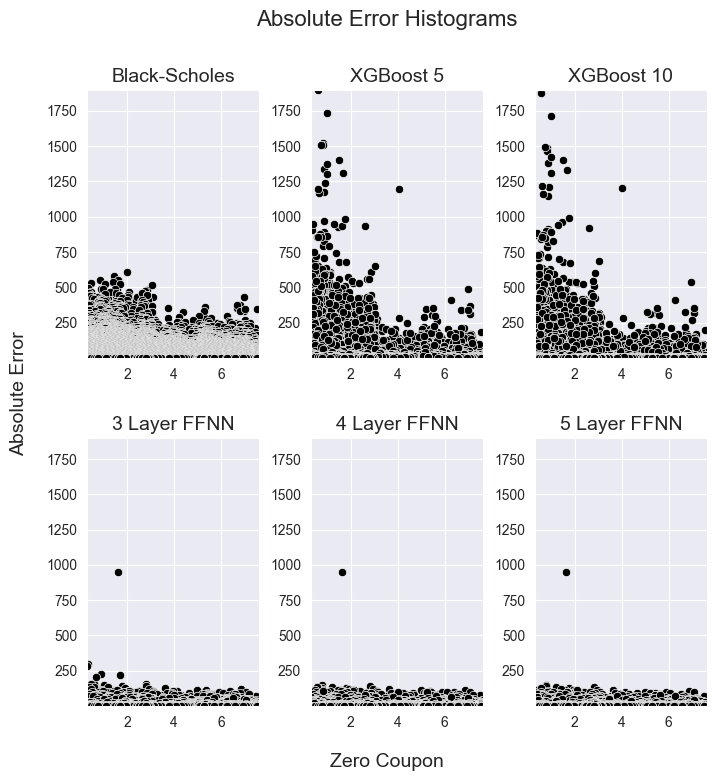

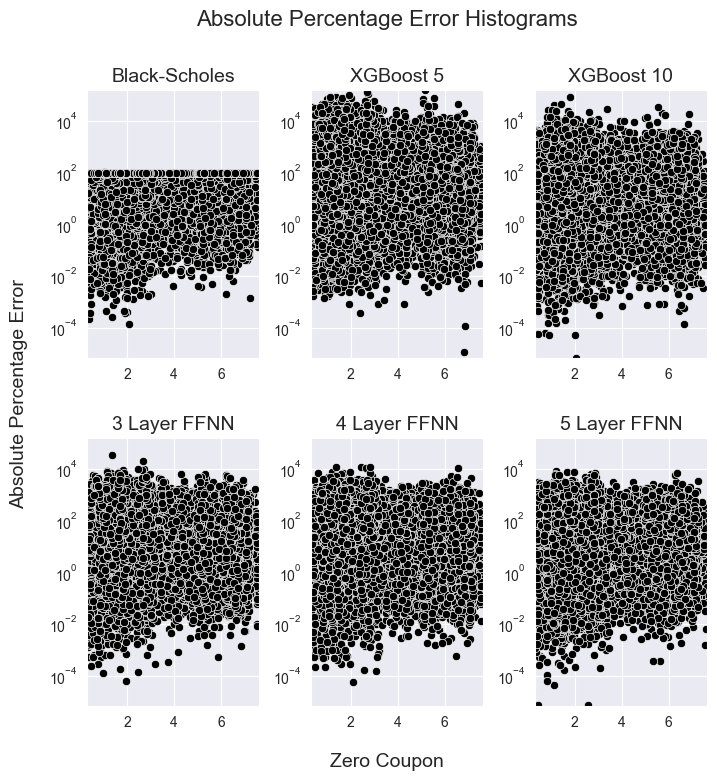

In [87]:
x_value = 'Zero Coupon'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

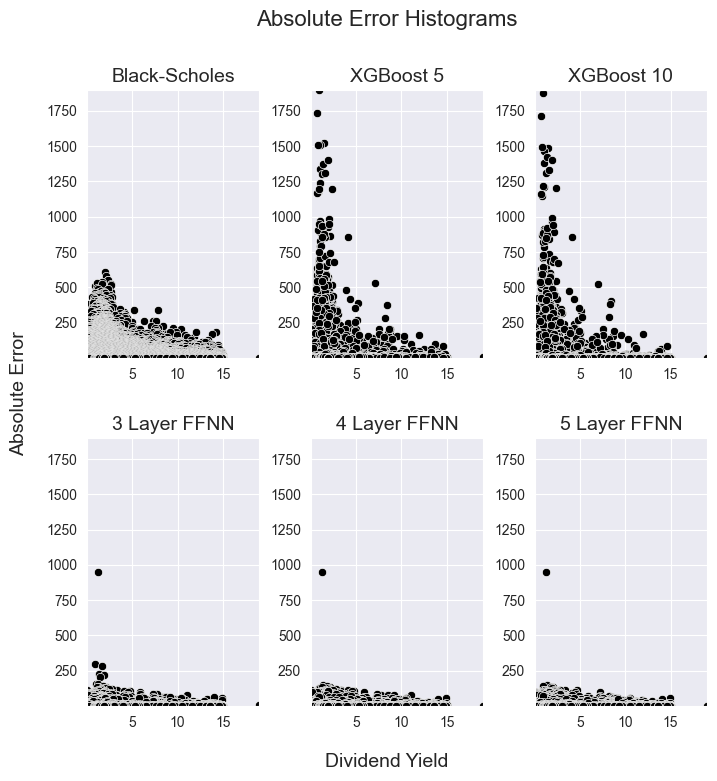

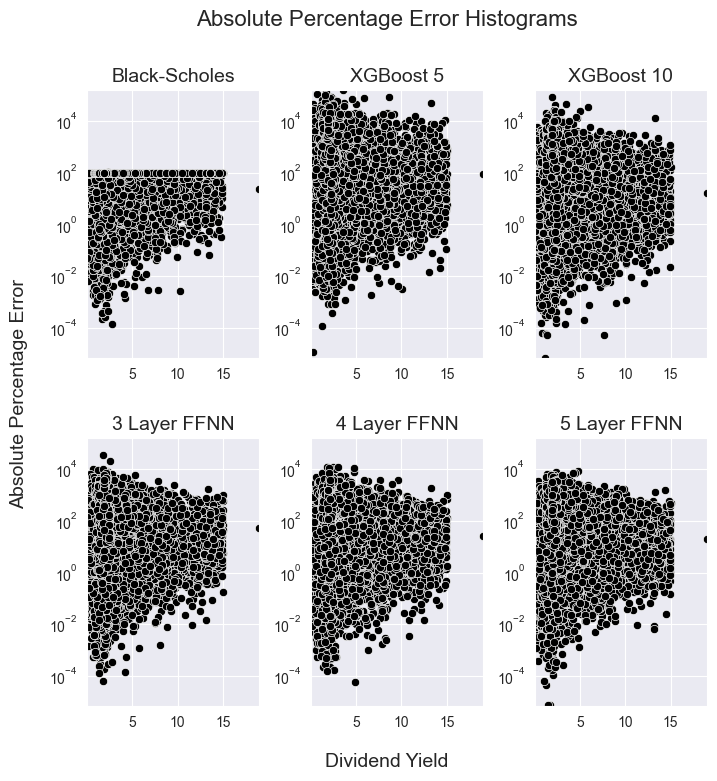

In [88]:
x_value = 'Dividend Yield'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

In [89]:
# Create a new DataFrame with the Summary Statistics of the Absolute Error of Each Model by Total and Option Type
summary_table = df_filt.groupby('Option Type').describe()[['Black-Scholes Absolute Error', 'XGBoost 5 Absolute Error', 'XGBoost 10 Absolute Error',
                                                            '3 Layer FFNN Absolute Error', '4 Layer FFNN Absolute Error',
                                                            '5 Layer FFNN Absolute Error']].round(2)
# Add a Totals Row
summary_table.loc['Total'] = summary_table.mean()

In [90]:
summary_table['Black-Scholes Absolute Error']

count   mean     std  min   25%     50%    75%      max
Option Type                                                           
Call         54934.0  28.23  44.320  0.0  2.99  11.690  34.63  606.720
Put          52575.0  21.17  35.450  0.0  2.23   8.300  24.31  516.150
Total        53754.5  24.70  39.885  0.0  2.61   9.995  29.47  561.435

In [91]:
summary_table['XGBoost 5 Absolute Error']

count   mean    std  min   25%   50%   75%      max
Option Type                                                       
Call         54934.0  13.33  49.08  0.0  1.54  3.75  8.28  1898.28
Put          52575.0   7.41  25.68  0.0  1.26  2.97  6.20   970.66
Total        53754.5  10.37  37.38  0.0  1.40  3.36  7.24  1434.47

In [92]:
summary_table['XGBoost 10 Absolute Error']

count   mean     std  min   25%    50%   75%      max
Option Type                                                         
Call         54934.0  10.13  47.860  0.0  0.47  1.240  3.33  1878.02
Put          52575.0   4.55  24.590  0.0  0.37  0.910  2.09   944.30
Total        53754.5   7.34  36.225  0.0  0.42  1.075  2.71  1411.16

In [93]:
summary_table['3 Layer FFNN Absolute Error']

count   mean     std  min    25%    50%   75%     max
Option Type                                                         
Call         54934.0  6.200  10.700  0.0  0.910  2.850  7.27  946.21
Put          52575.0  5.110   8.590  0.0  0.700  2.260  5.83  284.67
Total        53754.5  5.655   9.645  0.0  0.805  2.555  6.55  615.44

In [94]:
summary_table['4 Layer FFNN Absolute Error']

count  mean    std  min    25%    50%   75%      max
Option Type                                                        
Call         54934.0  5.30  9.460  0.0  0.770  2.370  6.17  946.730
Put          52575.0  4.46  7.610  0.0  0.620  1.940  5.03  127.080
Total        53754.5  4.88  8.535  0.0  0.695  2.155  5.60  536.905

In [95]:
summary_table['5 Layer FFNN Absolute Error']

count   mean   std  min    25%   50%   75%     max
Option Type                                                      
Call         54934.0  5.200  9.34  0.0  0.740  2.33  6.05  949.93
Put          52575.0  4.330  7.36  0.0  0.570  1.85  4.91  143.01
Total        53754.5  4.765  8.35  0.0  0.655  2.09  5.48  546.47

In [96]:
# Create a new DataFrame with the Summary Statistics of the Absolute Percentage Error of Each Model by Total and Option Type
summary_table = df_filt.groupby('Option Type').describe()[['Black-Scholes Absolute Percentage Error', 'XGBoost 5 Absolute Percentage Error',
                                                           'XGBoost 10 Absolute Percentage Error', '3 Layer FFNN Absolute Percentage Error',
                                                           '4 Layer FFNN Absolute Percentage Error', '5 Layer FFNN Absolute Percentage Error']
                                                           ].round(2)
# Add a Totals Row
summary_table.loc['Total'] = summary_table.mean()

In [97]:
summary_table['Black-Scholes Absolute Percentage Error']

count   mean    std  min     25%      50%    75%     max
Option Type                                                            
Call         54934.0  57.18  43.27  0.0   8.410   68.270  100.0  100.00
Put          52575.0  70.22  39.85  0.0  26.580  100.000  100.0  108.16
Total        53754.5  63.70  41.56  0.0  17.495   84.135  100.0  104.08

In [98]:
summary_table['XGBoost 5 Absolute Percentage Error']

count    mean      std  min    25%     50%    75%        max
Option Type                                                                
Call         54934.0  193.39  1519.06  0.0  2.660   8.550  29.68   98432.56
Put          52575.0  264.49  1958.62  0.0  4.470  14.420  54.78  157612.42
Total        53754.5  228.94  1738.84  0.0  3.565  11.485  42.23  128022.49

In [99]:
summary_table['XGBoost 10 Absolute Percentage Error']

count   mean      std  min   25%    50%    75%        max
Option Type                                                             
Call         54934.0  47.62  436.630  0.0  1.11  3.480  11.91  43639.390
Put          52575.0  59.06  570.440  0.0  1.71  5.130  17.45  85235.800
Total        53754.5  53.34  503.535  0.0  1.41  4.305  14.68  64437.595

In [100]:
summary_table['3 Layer FFNN Absolute Percentage Error']

count   mean      std  min   25%    50%     75%        max
Option Type                                                              
Call         54934.0  41.13  230.970  0.0  1.66   7.90  29.420  34544.640
Put          52575.0  54.99  229.680  0.0  3.96  15.20  43.830  20662.350
Total        53754.5  48.06  230.325  0.0  2.81  11.55  36.625  27603.495

In [101]:
summary_table['4 Layer FFNN Absolute Percentage Error']

count   mean     std  min    25%     50%     75%       max
Option Type                                                              
Call         54934.0  35.89  170.74  0.0  1.380   6.700  25.890  12226.27
Put          52575.0  45.67  174.00  0.0  3.310  13.130  38.940  11990.47
Total        53754.5  40.78  172.37  0.0  2.345   9.915  32.415  12108.37

In [102]:
summary_table['5 Layer FFNN Absolute Percentage Error']

count    mean     std  min   25%    50%    75%       max
Option Type                                                            
Call         54934.0  33.060  143.39  0.0  1.36   6.32  24.51  8344.000
Put          52575.0  42.310  144.83  0.0  3.14  12.26  37.57  7222.350
Total        53754.5  37.685  144.11  0.0  2.25   9.29  31.04  7783.175

In [103]:
# Create a Table with the Mean Absolute Error from Each Model
mean_absolute_error_table = df_filt.groupby('Option Type').mean()[['Black-Scholes Absolute Error', 'XGBoost 5 Absolute Error',
                                                                   'XGBoost 10 Absolute Error', '3 Layer FFNN Absolute Error',
                                                                   '4 Layer FFNN Absolute Error', '5 Layer FFNN Absolute Error']].round(2)
# Add a Totals Row
mean_absolute_error_table.loc['Total'] = mean_absolute_error_table.mean()

# Rename Columns with the Model Name + MAE
mean_absolute_error_table.columns = ['Black-Scholes MAE', 'XGBoost 5 MAE', 'XGBoost 10 MAE', '3 Layer FFNN MAE', '4 Layer FFNN MAE',
                                     '5 Layer FFNN MAE']

df = mean_absolute_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type         Call    Put   Total
5 Layer FFNN MAE    5.20   4.33   4.765
4 Layer FFNN MAE    5.30   4.46   4.880
3 Layer FFNN MAE    6.20   5.11   5.655
XGBoost 10 MAE     10.13   4.55   7.340
XGBoost 5 MAE      13.33   7.41  10.370
Black-Scholes MAE  28.23  21.17  24.700

In [104]:
# Create a Table with the Mean Absolute Percentage Error from Each Model
mean_absolute_percentage_error_table = df_filt.groupby('Option Type').mean()[['Black-Scholes Absolute Percentage Error', 'XGBoost 5 Absolute Percentage Error',
                                                                              'XGBoost 10 Absolute Percentage Error', '3 Layer FFNN Absolute Percentage Error',
                                                                              '4 Layer FFNN Absolute Percentage Error', '5 Layer FFNN Absolute Percentage Error']
                                                                              ].round(2)

# Add a Totals Row
mean_absolute_percentage_error_table.loc['Total'] = mean_absolute_percentage_error_table.mean()

# Rename Columns with the Model Name + MAPE
mean_absolute_percentage_error_table.columns = ['Black-Scholes MAPE', 'XGBoost 5 MAPE', 'XGBoost 10 MAPE', '3 Layer FFNN MAPE',
                                                '4 Layer FFNN MAPE', '5 Layer FFNN MAPE']

df = mean_absolute_percentage_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type           Call     Put    Total
5 Layer FFNN MAPE    33.06   42.31   37.685
4 Layer FFNN MAPE    35.89   45.67   40.780
3 Layer FFNN MAPE    41.13   54.99   48.060
XGBoost 10 MAPE      47.62   59.06   53.340
Black-Scholes MAPE   57.18   70.22   63.700
XGBoost 5 MAPE      193.39  264.49  228.940

# Analysis of Results for Options worth more than 100 dollars

In [105]:
# Filter Out Values where 'Midpoint' is Less than 100
df_filt = df_filt[df_filt['Midpoint'] > 100]

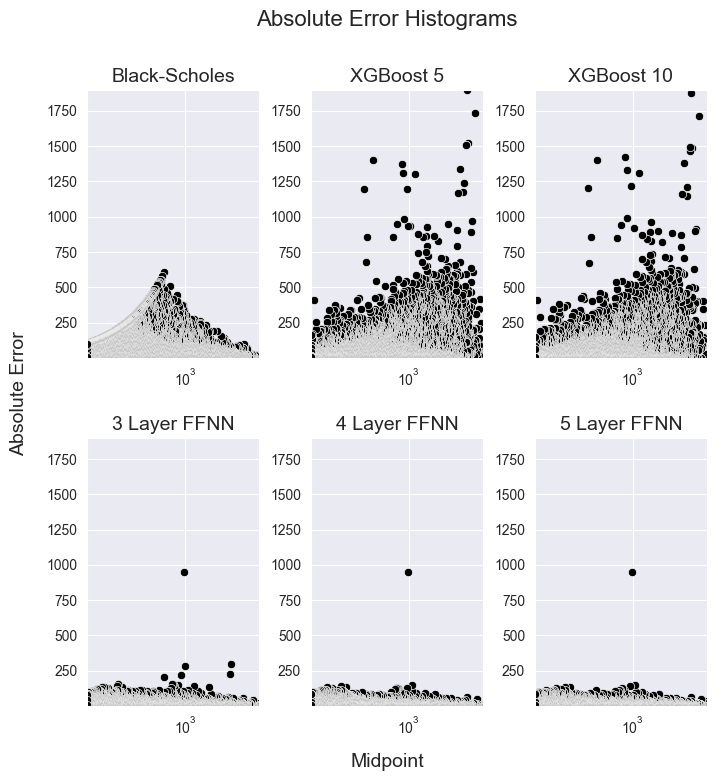

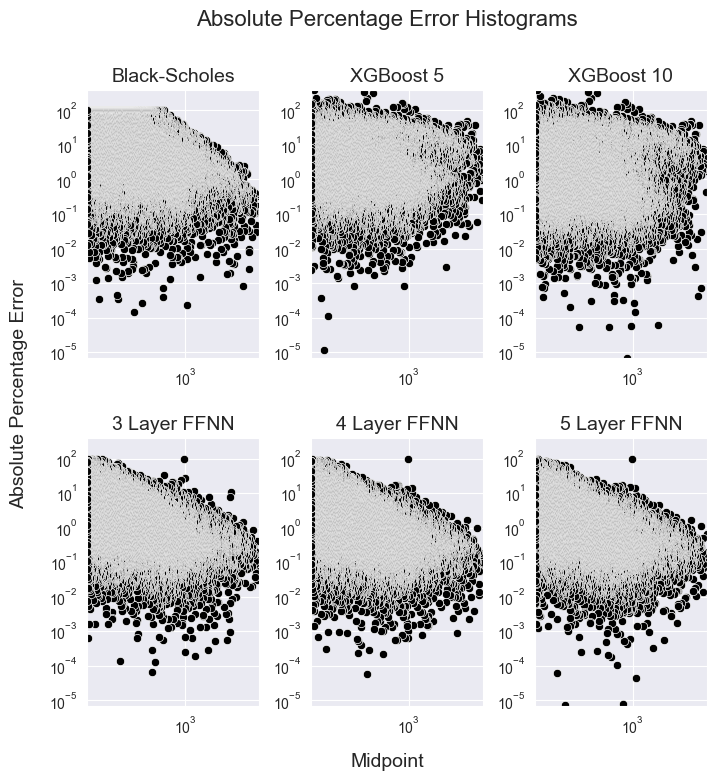

In [106]:
x_value = 'Midpoint'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

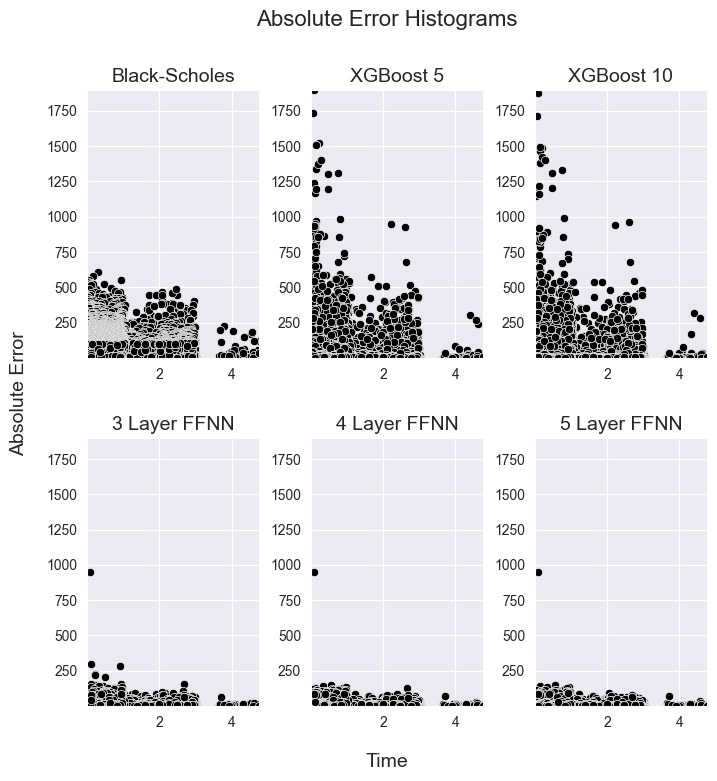

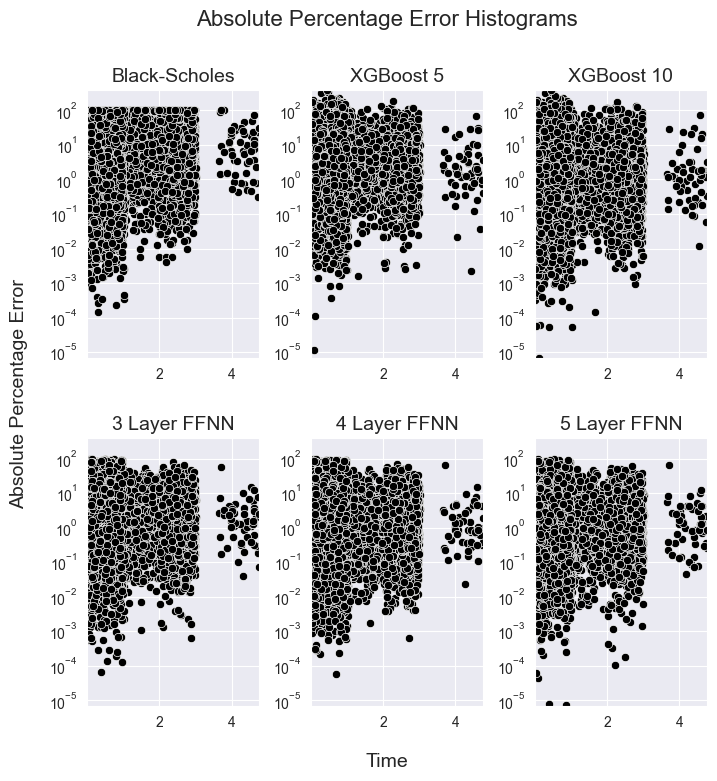

In [107]:
x_value = 'Time'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

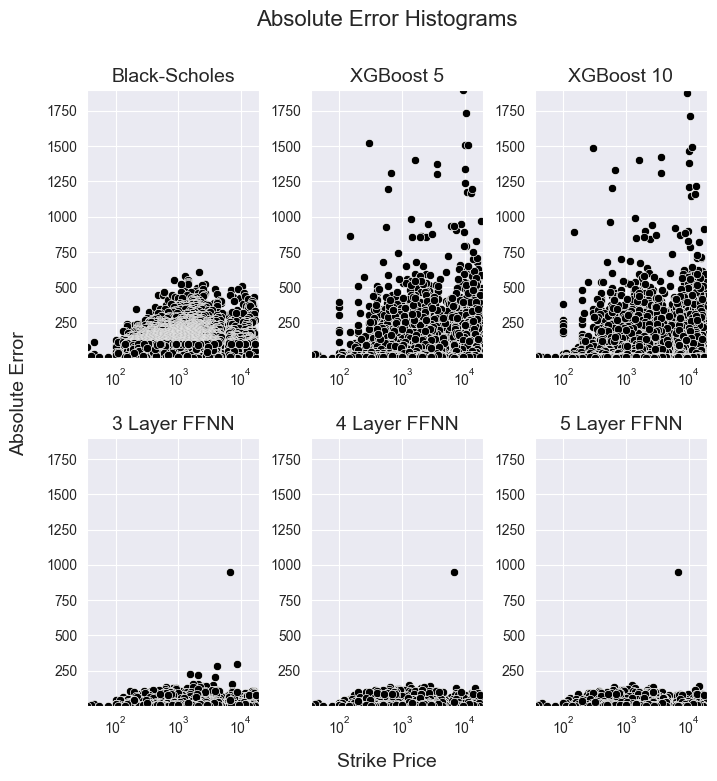

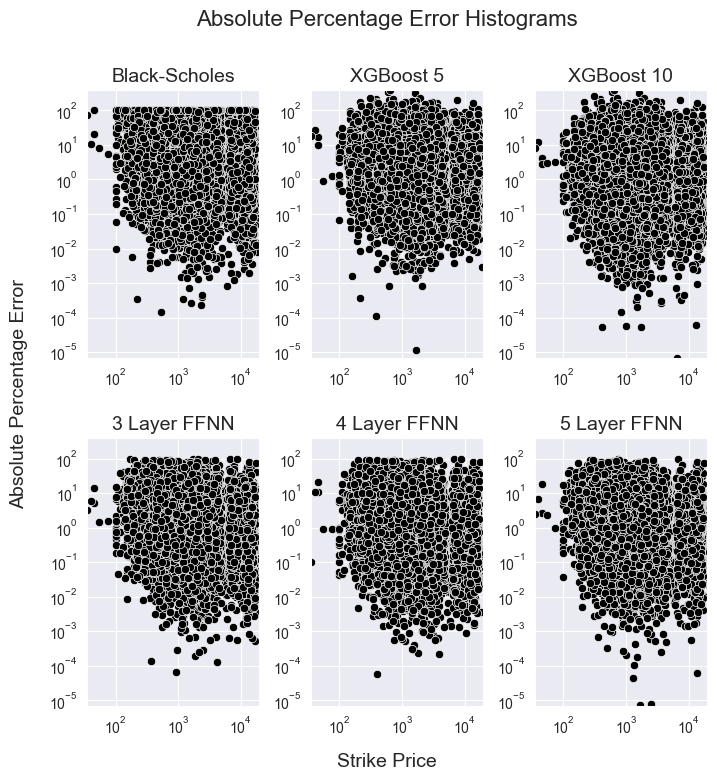

In [108]:
x_value = 'Strike Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

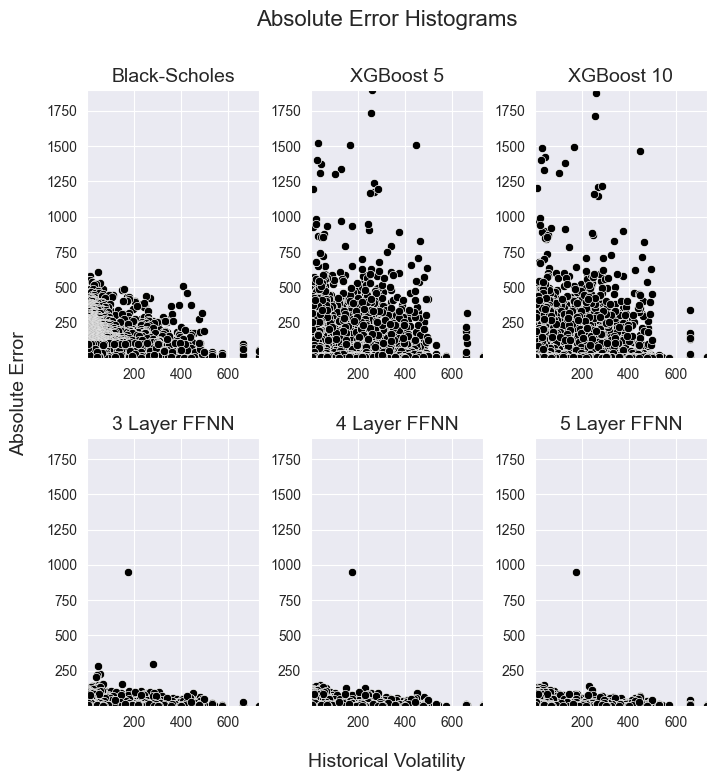

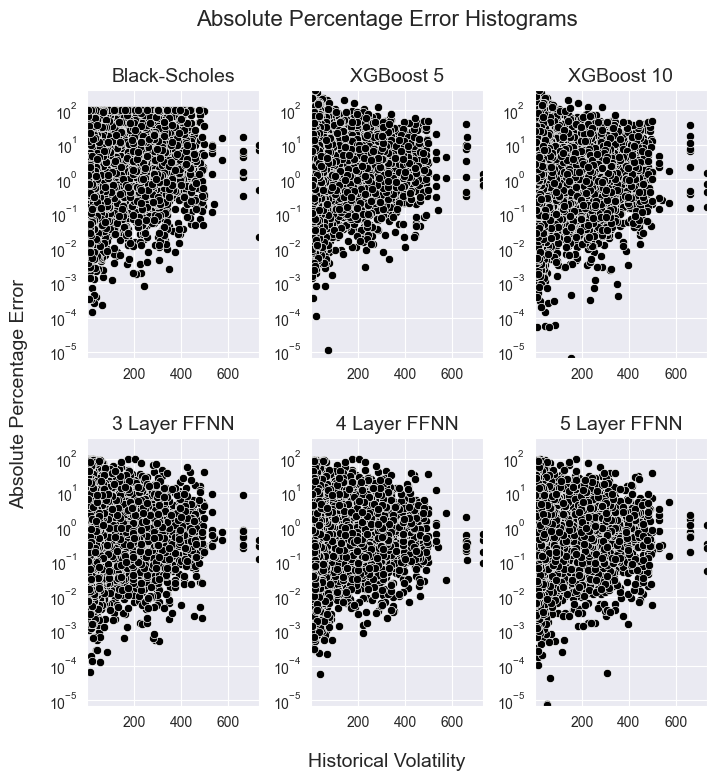

In [109]:
x_value = 'Historical Volatility'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

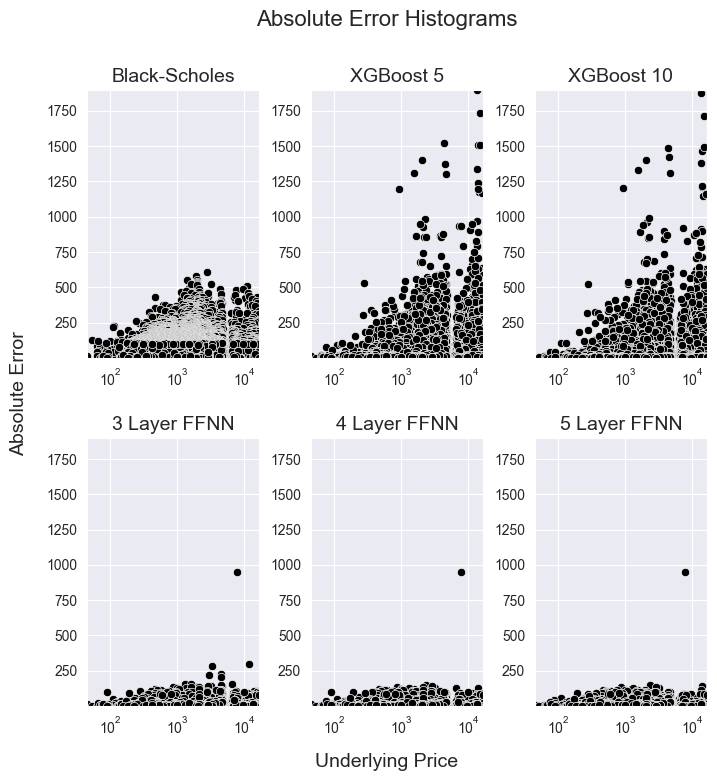

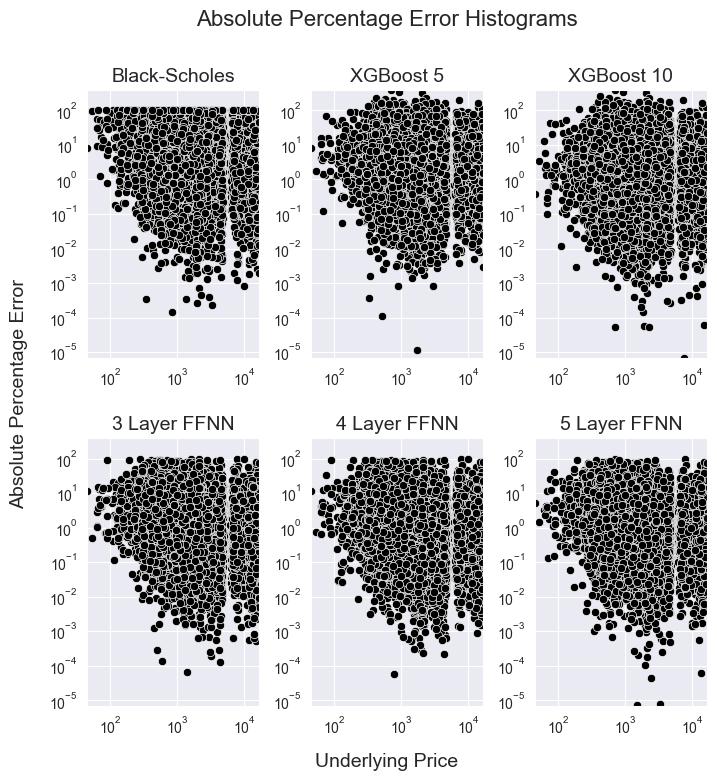

In [110]:
x_value = 'Underlying Price'
plot_absolute_error(df_filt, x_value, x_log=True, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=True, y_log=True)

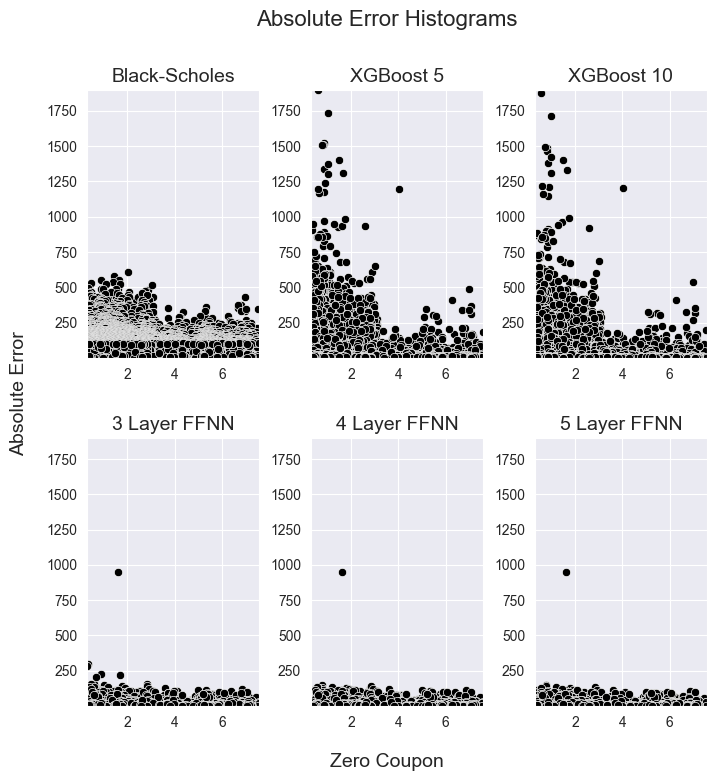

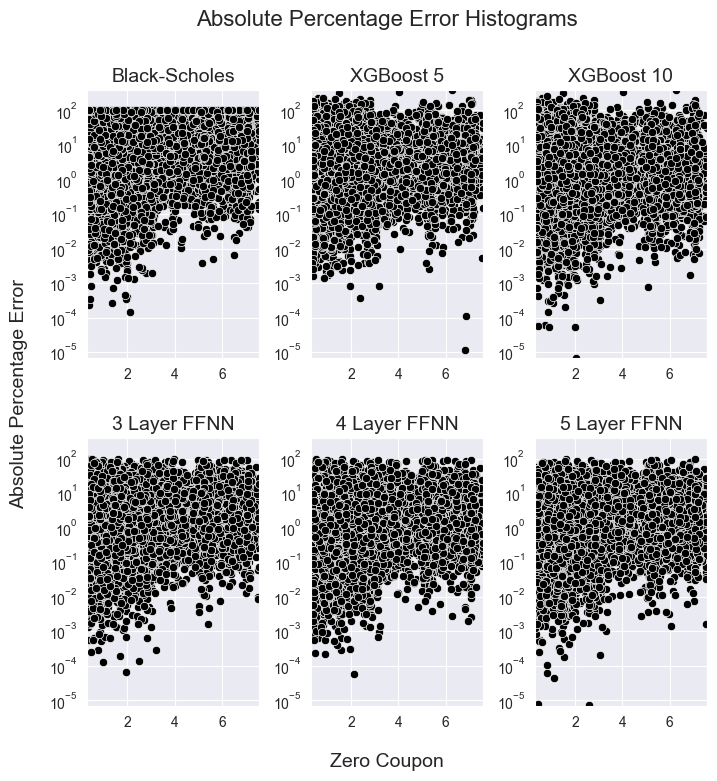

In [111]:
x_value = 'Zero Coupon'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

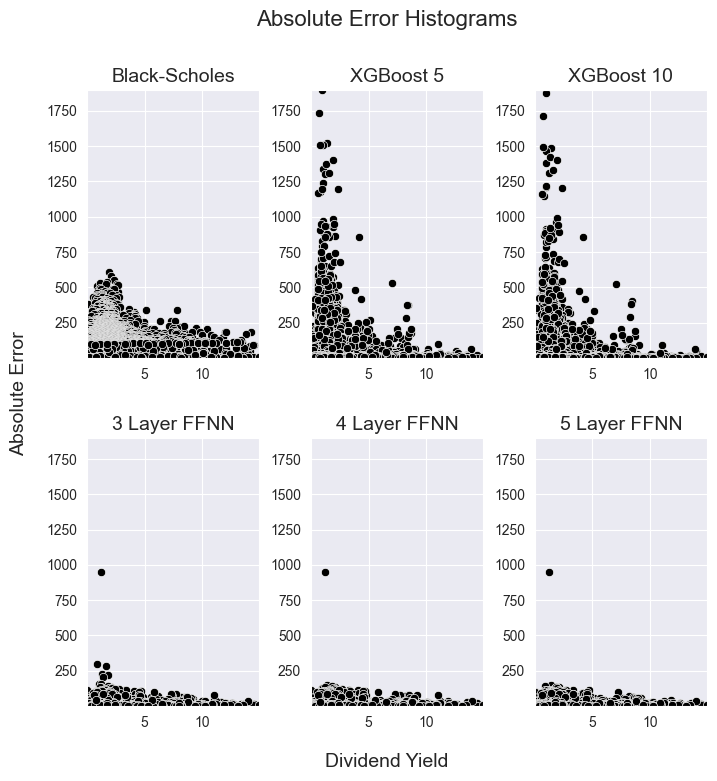

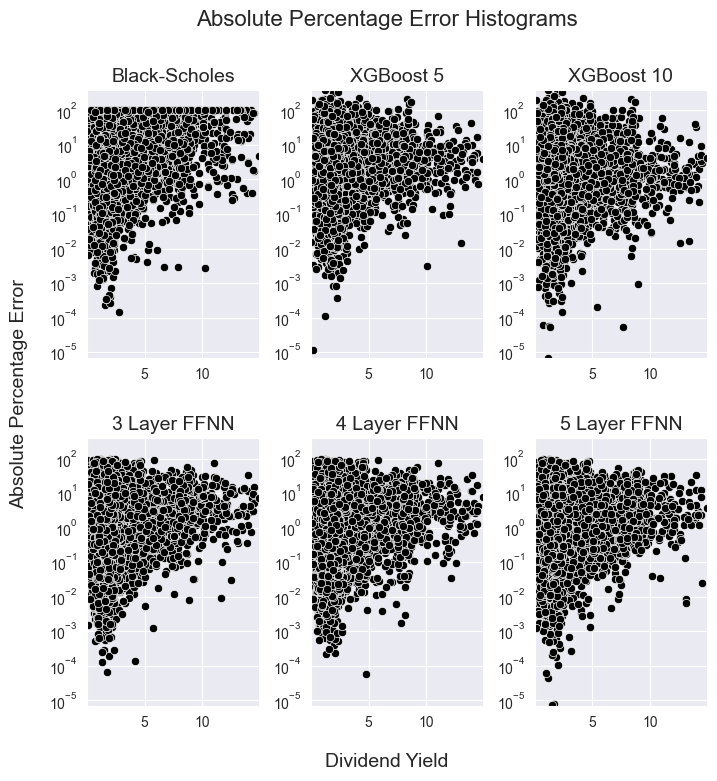

In [112]:
x_value = 'Dividend Yield'
plot_absolute_error(df_filt, x_value, x_log=False, y_log=False)
plot_absolute_percentage_error(df_filt, x_value, x_log=False, y_log=True)

In [113]:
# Create a new DataFrame with the Summary Statistics of the Absolute Error of Each Model by Total and Option Type
summary_table = df_filt.groupby('Option Type').describe()[['Black-Scholes Absolute Error', 'XGBoost 5 Absolute Error', 'XGBoost 10 Absolute Error',
                                                            '3 Layer FFNN Absolute Error', '4 Layer FFNN Absolute Error',
                                                            '5 Layer FFNN Absolute Error']].round(2)
# Add a Totals Row
summary_table.loc['Total'] = summary_table.mean()

In [114]:
summary_table['Black-Scholes Absolute Error']

count   mean     std  min   25%     50%     75%      max
Option Type                                                            
Call         19264.0  48.95  64.160  0.0  6.53  23.020  68.000  606.720
Put           9858.0  51.67  63.650  0.0  6.99  25.370  77.270  516.150
Total        14561.0  50.31  63.905  0.0  6.76  24.195  72.635  561.435

In [115]:
summary_table['XGBoost 5 Absolute Error']

count    mean    std  min    25%   50%    75%      max
Option Type                                                          
Call         19264.0  29.270  79.44  0.0  3.410  7.77  16.85  1898.28
Put           9858.0  20.340  54.32  0.0  2.980  6.75  13.91   970.66
Total        14561.0  24.805  66.88  0.0  3.195  7.26  15.38  1434.47

In [116]:
summary_table['XGBoost 10 Absolute Error']

count    mean     std  min    25%    50%   75%      max
Option Type                                                           
Call         19264.0  25.220  77.930  0.0  1.320  3.830  9.78  1878.02
Put           9858.0  16.890  53.260  0.0  1.270  3.400  7.74   944.30
Total        14561.0  21.055  65.595  0.0  1.295  3.615  8.76  1411.16

In [117]:
summary_table['3 Layer FFNN Absolute Error']

count  mean     std  min    25%   50%     75%     max
Option Type                                                         
Call         19264.0  8.99  14.730  0.0  1.810  4.55  10.710  946.21
Put           9858.0  9.31  13.720  0.0  1.780  4.59  11.300  284.67
Total        14561.0  9.15  14.225  0.0  1.795  4.57  11.005  615.44

In [118]:
summary_table['4 Layer FFNN Absolute Error']

count  mean    std  min    25%    50%   75%      max
Option Type                                                        
Call         19264.0  7.40  12.87  0.0  1.450  3.620  8.72  946.730
Put           9858.0  7.78  11.65  0.0  1.480  3.830  9.28  127.080
Total        14561.0  7.59  12.26  0.0  1.465  3.725  9.00  536.905

In [119]:
summary_table['5 Layer FFNN Absolute Error']

count  mean     std  min   25%   50%   75%     max
Option Type                                                      
Call         19264.0  7.33  12.720  0.0  1.46  3.68  8.57  949.93
Put           9858.0  7.61  11.070  0.0  1.52  3.82  9.03  143.01
Total        14561.0  7.47  11.895  0.0  1.49  3.75  8.80  546.47

In [120]:
# Create a new DataFrame with the Summary Statistics of the Absolute Percentage Error of Each Model by Total and Option Type
summary_table = df_filt.groupby('Option Type').describe()[['Black-Scholes Absolute Percentage Error', 'XGBoost 5 Absolute Percentage Error',
                                                           'XGBoost 10 Absolute Percentage Error', '3 Layer FFNN Absolute Percentage Error',
                                                           '4 Layer FFNN Absolute Percentage Error', '5 Layer FFNN Absolute Percentage Error']
                                                           ].round(2)
# Add a Totals Row
summary_table.loc['Total'] = summary_table.mean()

In [121]:
summary_table['Black-Scholes Absolute Percentage Error']

count   mean     std  min    25%    50%     75%    max
Option Type                                                          
Call         19264.0  21.32  30.360  0.0  1.580   6.77  26.350  100.0
Put           9858.0  26.58  32.990  0.0  2.410  10.73  38.160  100.0
Total        14561.0  23.95  31.675  0.0  1.995   8.75  32.255  100.0

In [122]:
summary_table['XGBoost 5 Absolute Percentage Error']

count  mean    std  min   25%    50%    75%     max
Option Type                                                       
Call         19264.0  6.67  13.29  0.0  1.11  2.710  6.390  383.39
Put           9858.0  6.77  12.57  0.0  1.31  3.080  6.700  219.77
Total        14561.0  6.72  12.93  0.0  1.21  2.895  6.545  301.58

In [123]:
summary_table['XGBoost 10 Absolute Percentage Error']

count   mean     std  min   25%    50%    75%     max
Option Type                                                         
Call         19264.0  5.180  12.800  0.0  0.46  1.380  3.730  388.38
Put           9858.0  5.070  12.030  0.0  0.60  1.590  3.720  226.78
Total        14561.0  5.125  12.415  0.0  0.53  1.485  3.725  307.58

In [124]:
summary_table['3 Layer FFNN Absolute Percentage Error']

count  mean    std  min   25%    50%   75%     max
Option Type                                                      
Call         19264.0  3.84  7.020  0.0  0.46  1.390  4.11  94.760
Put           9858.0  4.88  8.210  0.0  0.66  1.980  5.59  96.810
Total        14561.0  4.36  7.615  0.0  0.56  1.685  4.85  95.785

In [125]:
summary_table['4 Layer FFNN Absolute Percentage Error']

count   mean    std  min   25%   50%   75%     max
Option Type                                                      
Call         19264.0  3.270  6.410  0.0  0.36  1.12  3.35  94.820
Put           9858.0  4.160  7.440  0.0  0.56  1.62  4.51  94.490
Total        14561.0  3.715  6.925  0.0  0.46  1.37  3.93  94.655

In [126]:
summary_table['5 Layer FFNN Absolute Percentage Error']

count   mean    std  min    25%    50%   75%    max
Option Type                                                       
Call         19264.0  3.170  6.150  0.0  0.370  1.130  3.35  95.14
Put           9858.0  4.040  7.000  0.0  0.560  1.620  4.47  94.84
Total        14561.0  3.605  6.575  0.0  0.465  1.375  3.91  94.99

In [127]:
# Create a Table with the Mean Absolute Error from Each Model
mean_absolute_error_table = df_filt.groupby('Option Type').mean()[['Black-Scholes Absolute Error', 'XGBoost 5 Absolute Error',
                                                                   'XGBoost 10 Absolute Error', '3 Layer FFNN Absolute Error',
                                                                   '4 Layer FFNN Absolute Error', '5 Layer FFNN Absolute Error']].round(2)
# Add a Totals Row
mean_absolute_error_table.loc['Total'] = mean_absolute_error_table.mean()

# Rename Columns with the Model Name + MAE
mean_absolute_error_table.columns = ['Black-Scholes MAE', 'XGBoost 5 MAE', 'XGBoost 10 MAE', '3 Layer FFNN MAE', '4 Layer FFNN MAE',
                                     '5 Layer FFNN MAE']

df = mean_absolute_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type         Call    Put   Total
5 Layer FFNN MAE    7.33   7.61   7.470
4 Layer FFNN MAE    7.40   7.78   7.590
3 Layer FFNN MAE    8.99   9.31   9.150
XGBoost 10 MAE     25.22  16.89  21.055
XGBoost 5 MAE      29.27  20.34  24.805
Black-Scholes MAE  48.95  51.67  50.310

In [128]:
# Create a Table with the Mean Absolute Percentage Error from Each Model
mean_absolute_percentage_error_table = df_filt.groupby('Option Type').mean()[['Black-Scholes Absolute Percentage Error', 'XGBoost 5 Absolute Percentage Error',
                                                                              'XGBoost 10 Absolute Percentage Error', '3 Layer FFNN Absolute Percentage Error',
                                                                              '4 Layer FFNN Absolute Percentage Error', '5 Layer FFNN Absolute Percentage Error']
                                                                              ].round(2)

# Add a Totals Row
mean_absolute_percentage_error_table.loc['Total'] = mean_absolute_percentage_error_table.mean()

# Rename Columns with the Model Name + MAPE
mean_absolute_percentage_error_table.columns = ['Black-Scholes MAPE', 'XGBoost 5 MAPE', 'XGBoost 10 MAPE', '3 Layer FFNN MAPE',
                                                '4 Layer FFNN MAPE', '5 Layer FFNN MAPE']

df = mean_absolute_percentage_error_table.transpose()
df.sort_values(by='Total', ascending=True)

Option Type          Call    Put   Total
5 Layer FFNN MAPE    3.17   4.04   3.605
4 Layer FFNN MAPE    3.27   4.16   3.715
3 Layer FFNN MAPE    3.84   4.88   4.360
XGBoost 10 MAPE      5.18   5.07   5.125
XGBoost 5 MAPE       6.67   6.77   6.720
Black-Scholes MAPE  21.32  26.58  23.950